# Importing libraries

In [564]:
#Import all the necessary modules
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np


In [565]:
bank=pd.read_csv("bank-full.csv")

In [566]:
#let's look at the data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [567]:
#data type..
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### will need to handle those objects later to turn them into dummys, so can be modified to 0 and 1 and change to int64 instead. 

In [568]:
#data describe
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [569]:
bank.shape

(45211, 17)

### 45,211 entries!!! that is a lot. 

## The variance for age, balance, duration, pdays and previous. It will require normalization
## Let's look into this continuous values and then the categorical

In [570]:
#list of int cols and list of categorical cols
obj_col=list(bank.select_dtypes(include=['object']).columns)
int_col=list(bank.select_dtypes(include=['int64']).columns)


age


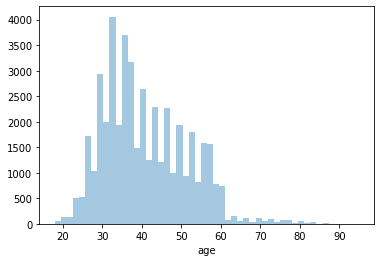

balance


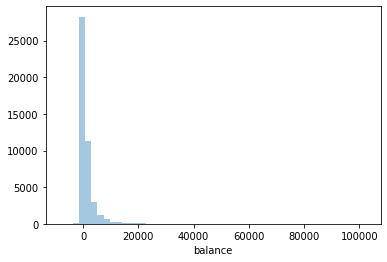

day


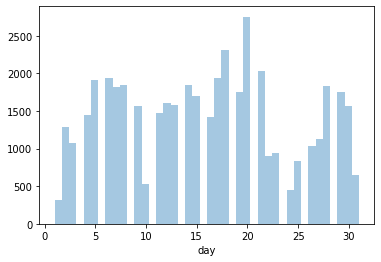

duration


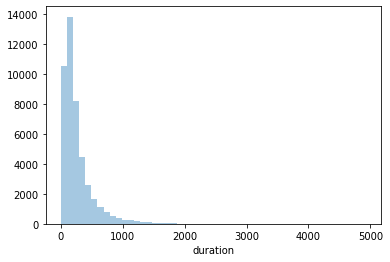

campaign


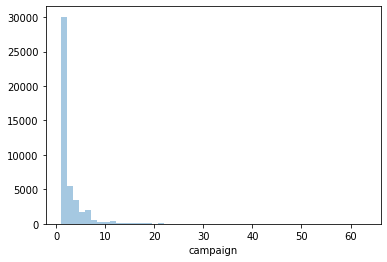

pdays


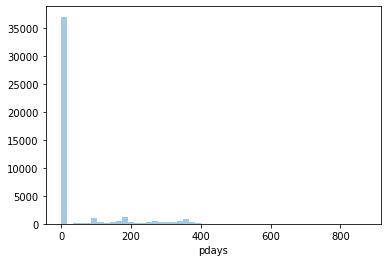

previous


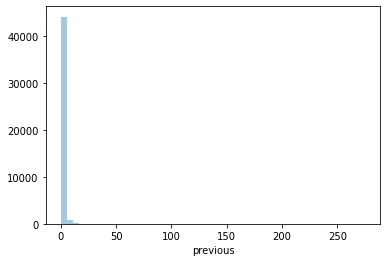

In [571]:
for i in int_col:
    print(i)
    sns.distplot(bank[i], kde=False)
    plt.show()

## Analyzing the distplots
### Age is skewed as expected. Greater than 60 people seem to be the outliers ..that could be looked at after we train it. Maybe removed
### Balance is very skewed. It seems like the higher the balance the more likely they will say yes to our Target per below analysis
### Day seems all over the place lets see later the correlations with target
### Duration, Campaign, Pdays and previous are right skewed as expected lets see if it has a relationship with target
### Should pdays become categoricals...or be removed.....

In [572]:
#Let's look a little longer at age balance
print(bank[bank['age']>60]['age'].count())
print(bank[bank['age']<60]['age'].count())
print ("The majority of people are less than 60 years old")
# sns.barplot(x='Target', y='age', data=bank)

1188
43427
The majority of people are less than 60 years old


<AxesSubplot:xlabel='age'>

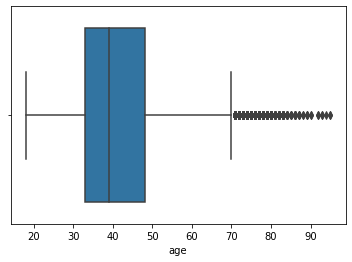

In [573]:
sns.boxplot(bank["age"])

##### actually more than 70 are the outliers
##### let's look at balance...there are people with negative maybe those can be combined

In [574]:
print(bank[bank['balance']<0]['balance'].count() , "Total of negative accounts")
print(bank[bank['balance']==0]['balance'].count() , "Total equal to 0")
print(bank[bank['balance']>0]['balance'].count() , "Total greater than 0")
print("Most are positive, let's make the negative all -1 to combine.")
#Let's look at target and balance now.....
print ("Out of 3766 only", bank[(bank['balance']<0) & (bank["Target"]== "yes")]["balance"].count() , "said yes")
print ("Out of 37932 only", bank[(bank['balance']>=0) & (bank["Target"]== "yes")]["balance"].count() , "said yes")

#thought of removing the negatives but there are some only 5% therefore we can just keep them as -1
bank.loc[bank.balance < 0, 'balance'] = -1

3766 Total of negative accounts
3514 Total equal to 0
37931 Total greater than 0
Most are positive, let's make the negative all -1 to combine.
Out of 3766 only 210 said yes
Out of 37932 only 5079 said yes


##### per data, more than double changes when balance is positive
##### 210/3766= 5% negative balance said yes
##### 5079/379332 = 1% positibe balance said yes

In [575]:
print(bank[bank['pdays']==0]['pdays'].count() , "Total of negative accounts")

0 Total of negative accounts


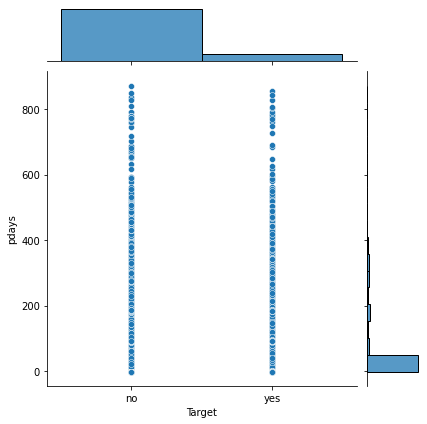

In [576]:
sns.jointplot(bank["Target"], bank["pdays"])
#there is not much correlation or so it seems

# Let's look at these continuous categories with our target in mind..


age


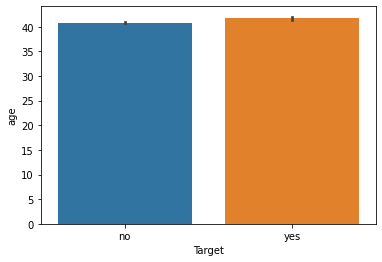

balance


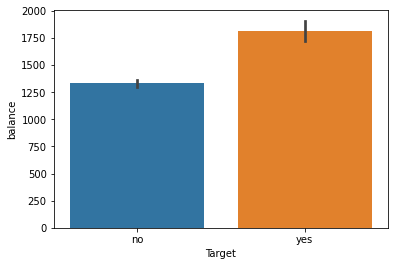

day


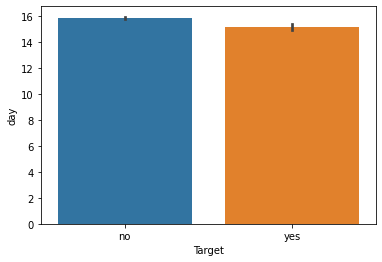

duration


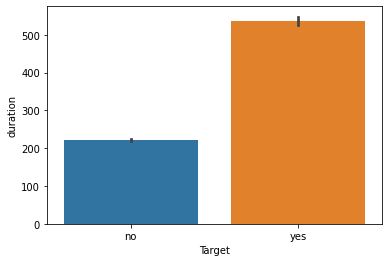

campaign


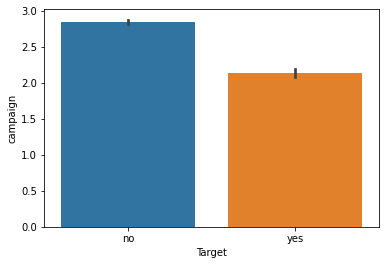

pdays


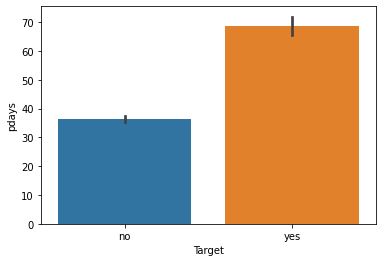

previous


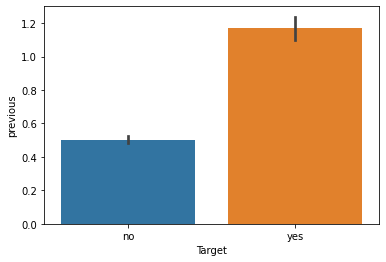

In [577]:
for i in int_col:
    print(i)
    sns.barplot(x='Target', y=i, data=bank)
    plt.show()

### There is no Age, Day much difference that is shown in the bar graph.
### Duration and balance and pdays how that higher is yes
### On the other hand campaing (number of contacts) seems not matter ..more doesn't mean more yes target

# Let's look at categorical values now!

In [578]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [579]:
#Used this function from google and modified a bit to see the percentages in the graphs
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

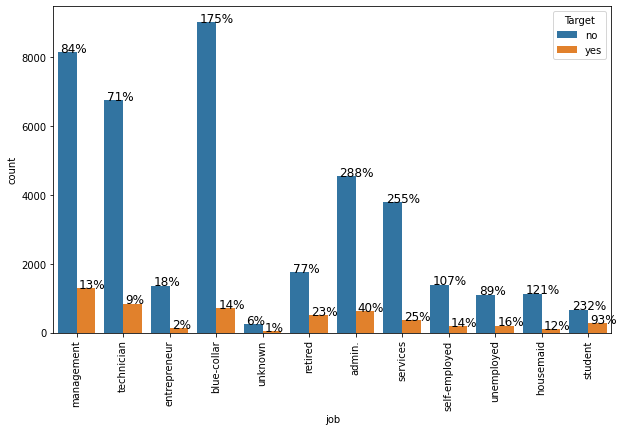

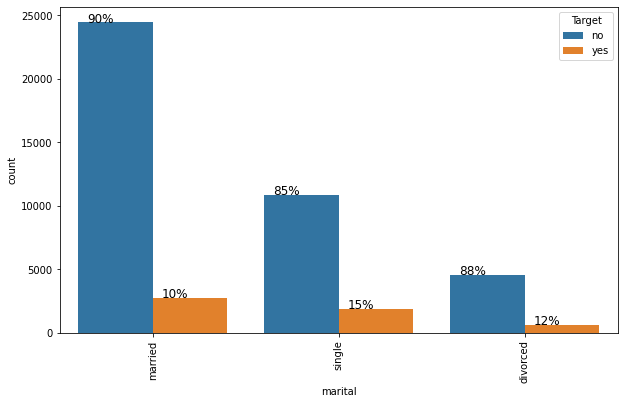

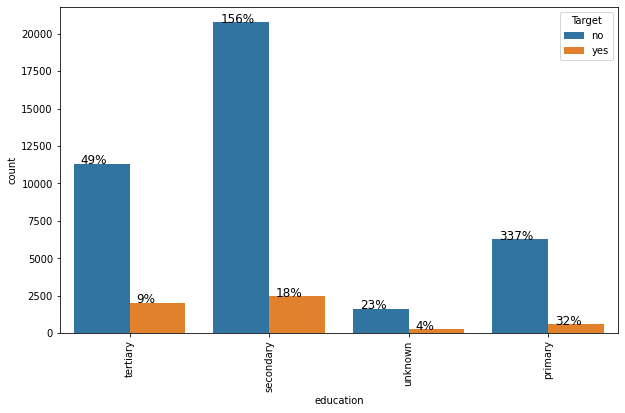

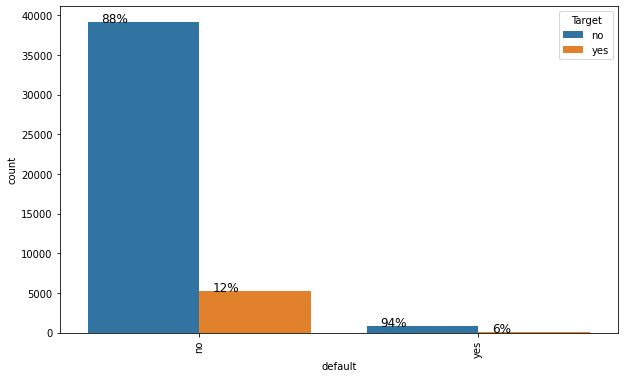

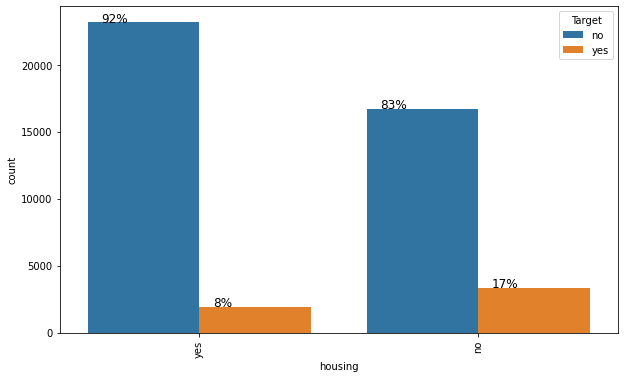

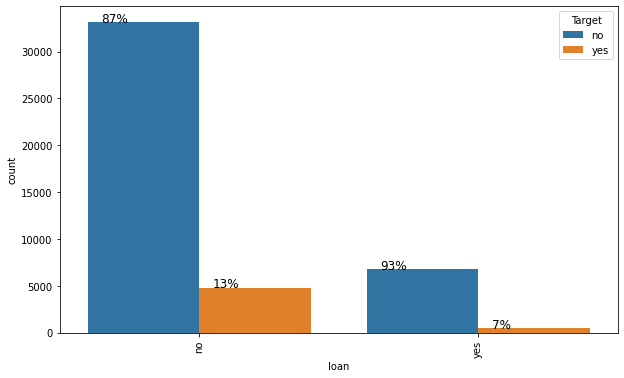

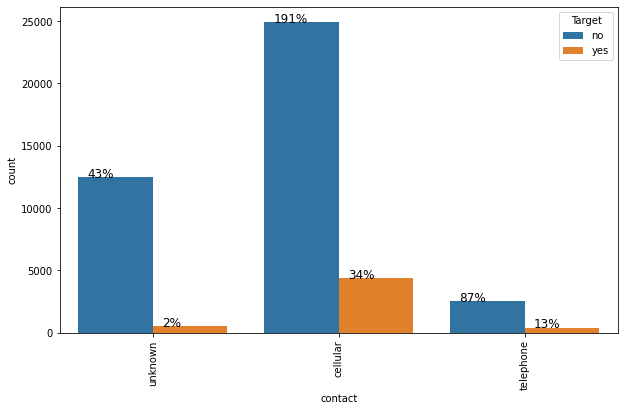

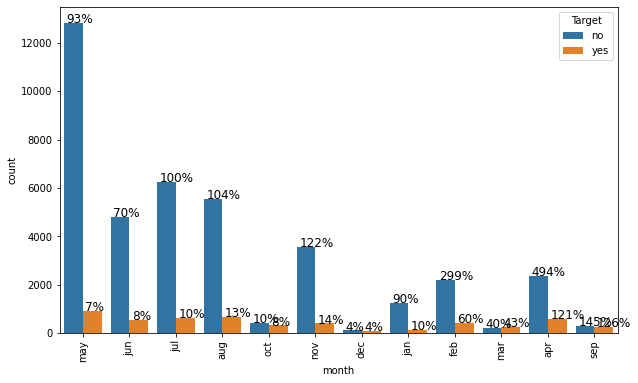

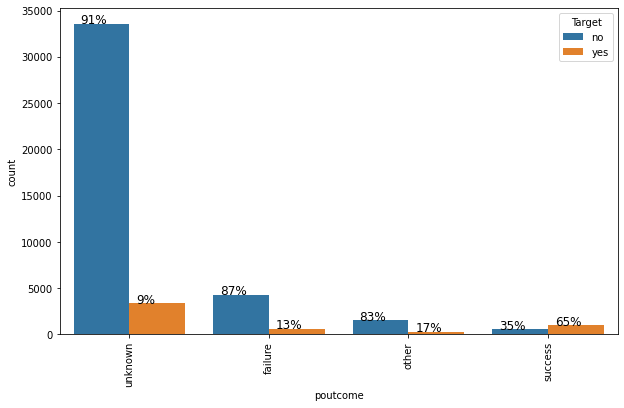

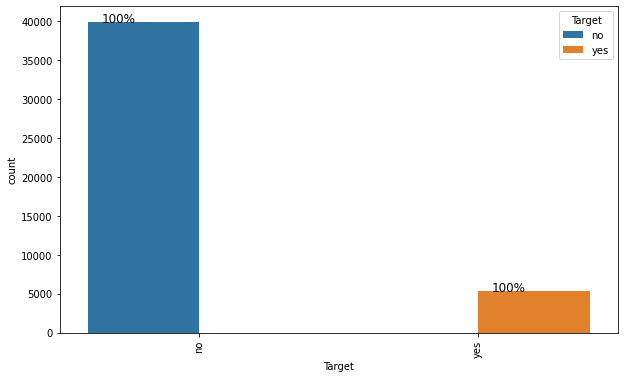

In [580]:
#let's see the graphs with percentage! Distribution of that category with respect to Target!
for i in obj_col:
    plt.figure(figsize=(10,6))
    plt.xticks(rotation=90)
    ax=sns.countplot(bank[i], hue=bank["Target"])
    with_hue(ax,bank[i], len(bank[i].unique()) ,2)
#     plt.xticks(rotation=90)
#     plt.show()

###### I know the function didn't work completely well in some graphs as we have some percentages over 100 or not adding up but we don't care aboutt he specific 
#### Uknown in job is 1% yes, very low compare to the rest therefore I will remove
#### Education Unknown is half of territary so I will leave it
#### for contact lots of people put unknown for contact so that is fine
#### poutcome has other an uknown. So odd. I wanted do something with it but the "yes percentage" on other and unknown is relatively average to high so I will not modify. Instead this might be something we want to let the bank know as in that it might be important. 17 percent of those that put other as a category said yes to deposit (Target )

In [532]:
# bank["marital"].value_counts(normalize=True) * 100
print("Actual percentage saying yes according to Marital status:")
print()
print("Married saying yes", (bank[(bank["marital"]=="married") & (bank["Target"]=="yes")]['marital'].count())/ bank[bank["marital"]=="married"]["marital"].count())
print("Married saying no", (bank[(bank["marital"]=="married") & (bank["Target"]=="no")]['marital'].count())/bank[bank["marital"]=="married"]["marital"].count())
print("Single saying yes", (bank[(bank["marital"]=="single") & (bank["Target"]=="yes")]['marital'].count())/ bank[bank["marital"]=="single"]["marital"].count())
print("Single saying no" , (bank[(bank["marital"]=="single") & (bank["Target"]=="no")]['marital'].count())/ bank[bank["marital"]=="single"]["marital"].count())
print("Divorced saying yes", (bank[(bank["marital"]=="divorced") & (bank["Target"]=="yes")]['marital'].count())/ bank[bank["marital"]=="divorced"]["marital"].count())
print("Divorced saying no", (bank[(bank["marital"]=="divorced") & (bank["Target"]=="no")]['marital'].count())/bank[bank["marital"]=="divorced"]["marital"].count())


Actual percentage saying yes according to Marital status:

Married saying yes 0.10123465863158668
Married saying no 0.8987653413684134
Single saying yes 0.1494917904612979
Single saying no 0.8505082095387021
Divorced saying yes 0.11945458037257538
Divorced saying no 0.8805454196274246


# Per bar graphs it looked as if the married couple would tend to say yes more so than single and divorsed but in reality single have higher rate of saying yes. 14% versus 10% 

In [582]:
#Let's make a list of those that have uknown
unknown=["job", "education", "contact", "poutcome"]
# bank[bank["Target"]=="yes"]["job"].value_counts(normalize=True)* 100
for i in unknown:
    print(i)
    print(bank[bank["Target"]=="yes"][i].value_counts(normalize=True) * 100)
    print(bank[i].unique())
    plt.show()
    print()

job
management       24.598223
technician       15.882019
blue-collar      13.386273
admin.           11.930422
retired           9.756098
services          6.976744
student           5.086028
unemployed        3.819247
self-employed     3.535640
entrepreneur      2.325581
housemaid         2.060881
unknown           0.642844
Name: job, dtype: float64
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

education
secondary    46.322556
tertiary     37.738703
primary      11.174135
unknown       4.764606
Name: education, dtype: float64
['tertiary' 'secondary' 'unknown' 'primary']

contact
cellular     82.605407
unknown      10.020798
telephone     7.373795
Name: contact, dtype: float64
['unknown' 'cellular' 'telephone']

poutcome
unknown    64.019663
success    18.491208
failure    11.684628
other       5.804500
Name: poutcome, dtype: float64
['unknown' 'failure' 'other' 'success']



In [586]:
#lets also modify
for i in obj_col:
    if len(bank[i].unique())==2:
        bank.loc[bank[i] == "yes", i] = 1
        bank.loc[bank[i] == "no", i] = 0
        bank[i] = bank[i].astype('int64')
        obj_col.remove(i)
    else:
        print(bank[i].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']


### So many categorical variables thinking about making Marital, Education, and Contact into 0, 1, 2 to change from categorical

In [584]:
# sns.pairplot(bank, height=3, diag_kind='Target')
# plt.show()

<AxesSubplot:>

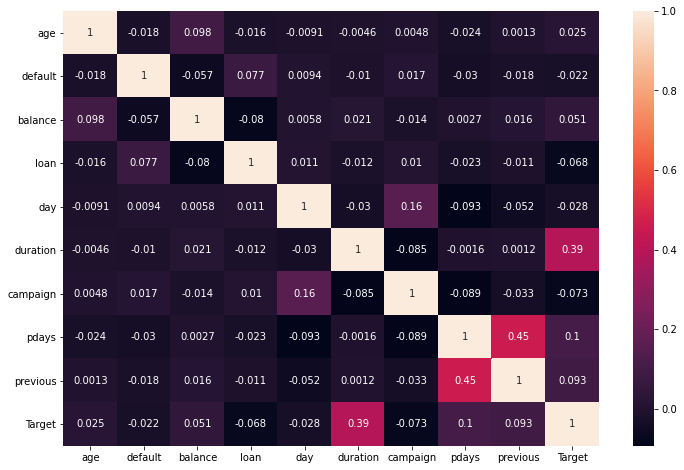

In [585]:
plt.figure(figsize=(12,8))
sns.heatmap(bank.corr(), annot=True)

### Duration has the most correlation with duration as we had suggested in our earlier bars
### Housing has negative correlation which makes sense, might be important
### Most are negative and a few (balance, pdays, previous) low correlation
## Let's start our Logistics Regression and Decision Tree alg

In [589]:
#dummy's for all of the objects col
print("Dummy's for these:" , obj_col)
bank = pd.get_dummies(bank, columns=obj_col)

Dummy's for these: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [563]:
bank.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_no,Target_yes
0,1.606965,0.248998,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0.288529,-0.448798,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,-0.747384,-0.457711,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,0.571051,0.038735,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,-0.747384,-0.458041,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,0,0,0,0,0,1,1,0


###### From 17 to 49 columns (almost double)
## Let's start

In [590]:
from scipy import stats
from scipy.stats import zscore
#Let's standarize values first
for i in int_col:
    bank[i] = bank[[i]].apply(zscore)

In [591]:
#Let's begin by seting our y and x
X = bank.drop('Target', axis=1)
Y = bank['Target'].astype('category')
#let's also divide tit by order 

In [592]:
#All libraries needed for the model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
# calculate accuracy measures and confusion matrix

In [593]:
#Let's split data in random and in order Option 1 or Option 2 
#(hoping this is what they meant by diferent matrices )

# #option 1
# #random splitting
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

#option 2
# Splitting data into training and test set for independent attributes
total=bank['Target'].count()
train_set = bank.head(int(round(total*0.7))) # Up to the last initial training set row
test_set = bank.tail(int(round(total*0.3))) # Past the last initial training set row
train_labels = train_set.pop("Target")
test_labels = test_set.pop("Target")

# Logistic Regression 

In [392]:
model = LogisticRegression(random_state=7)
model.fit(x_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [393]:
y_predict = model.predict(x_test)

In [394]:
# #let's check the model scores:
# print("Random Split")
trainM = model.score(x_train,y_train)
print("Model TRAINING Score:", trainM)
testM = model.score(x_test, y_test)
print("Model TESTING Score:", testM)
# print("With order split")
#let's check with our b matrix
# trainM = model.score(train_set, train_labels)
# print("Model TRAINING Score:", trainM)
# testM = model.score(test_set, test_labels)
# print("Model TESTING Score:", testM)

Model TRAINING Score: 0.9003697032894113
Model TESTING Score: 0.9058537304629902


###### Ran this twice one with the random split the other with the order split and the testing score was lower.. the accuracy can depend on detect lot of false which doesn't really tell much to the business as we care about recall and getting all those true positives and not missing any that would get an account with the bank

In [508]:
## Feature Importance or Coefficients 
c_logR = pd.DataFrame()
c_logR['Col'] = x_train.columns
# all_models['Col'] = train_set.columns
c_logR['Coeff LogisticR'] = np.round(abs(model.coef_[0]),2)
c_logR=c_logR.sort_values(by='Coeff LogisticR',ascending=False).head(10)


# to the business, per this model these are the features they should focuse on the most starting with giving the most importance to the first one in the above graph(Poutcome_success) lowering the importance as it goes down. Interesting I would have thought that duration would be the first one. At least it is the fifth and still has high importance.

Confusion Matrix


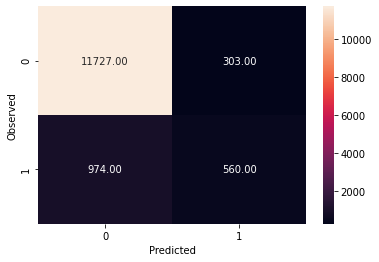

In [397]:
#Not too bad of test score
#let's evaluate the performance of the model
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [475]:
#Model Performance
print("Accuracy:",accuracy_score(y_test,y_predict))
ac_Lg=accuracy_score(y_test,y_predict)
print()
print("Recall:",recall_score(y_test,y_predict))
rc_Lg=recall_score(y_test,y_predict)
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
f1_Lg= f1_score(y_test,y_predict)
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

m_logisticR=[ac_Lg,rc_Lg,f1_Lg]


Accuracy: 0.9058537304629902

Recall: 0.3650586701434159

Precision: 0.6488991888760139

F1 Score: 0.4672507300792658

Roc Auc Score: 0.6699358188622317


# Recall is super Lowwwww and that is what we care about...let's see if the other models will do a better job.... (tried with the ordered split but the recal is .16!!! toooooooo low.
## F1 score is half accuracy...low.However, it is higher than recall..we need to improve these numbers so..

# Let's do Decision Tree now


In [399]:
from sklearn.tree import DecisionTreeClassifier

In [406]:
dt_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 7,
                               max_depth=3, min_samples_leaf=5)
dt_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [414]:
print (pd.DataFrame(dt_tree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by="Imp", ascending=False).head(10))
c_Tree=pd.DataFrame(dt_tree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by="Imp", ascending=False).head(10)


                        Imp
duration           0.664366
poutcome_success   0.335634
age                0.000000
month_feb          0.000000
education_unknown  0.000000
housing_no         0.000000
housing_yes        0.000000
contact_cellular   0.000000
contact_telephone  0.000000
contact_unknown    0.000000


In [415]:
trainM = dt_tree.score(x_train,y_train)
print("Model TRAINING Score:", trainM)
acc_dtree = dt_tree.score(x_test, y_test)
print("Model TESTING Score:", testM)

Model TRAINING Score: 0.8989477675609062
Model TESTING Score: 0.903420819817163


Confusion Matrix


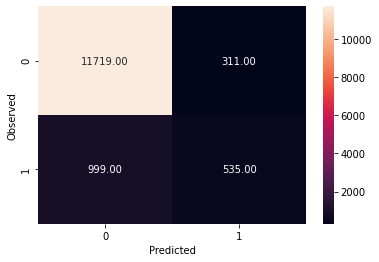

In [428]:
tree_ypredict = dt_tree.predict(x_test)
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, tree_ypredict)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [476]:
print("Accuracy:",accuracy_score(y_test,tree_ypredict))
ac_decisionT=accuracy_score(y_test,tree_ypredict)
print()
print("Recall:",recall_score(y_test,tree_ypredict))
rc_decisionT=recall_score(y_test,tree_ypredict)
print()
print("Precision:",precision_score(y_test,tree_ypredict))
print()
print("F1 Score:",f1_score(y_test,tree_ypredict))
f1_decisionT=f1_score(y_test,tree_ypredict)
print()
print("Roc Auc Score:",roc_auc_score(y_test,tree_ypredict))
m_decisionT=[ac_decisionT, rc_decisionT,f1_decisionT]

Accuracy: 0.903420819817163

Recall: 0.34876140808344197

Precision: 0.6323877068557919

F1 Score: 0.44957983193277307

Roc Auc Score: 0.6614546857541067


### The testing scored remained the same as that of the logistic regression.
### actually the accuracy of the the training is a little lower in this decision tree.. but very little 
### Duration is now number 1 important variable...interesting
# Let's do Boosting Classifier

In [594]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 50)
abcl = abcl.fit(x_train, y_train)

test_pred = abcl.predict(x_test)
abcl.score(x_test , y_test)

0.9029047478619876

#### the more n_estimators the best the score...used 20 and then 50 and it improved form 89 to 90
### however then I tried 5 instead of 50 thinking it would bring it down by at fewand but it remained at 89 just a few decimals less..

In [595]:
print (pd.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by="Imp", ascending=False).head(10))
c_boosting=pd.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by="Imp", ascending=False).head(10)


                     Imp
duration            0.32
day                 0.08
age                 0.06
pdays               0.06
housing             0.04
campaign            0.04
poutcome_success    0.04
education_tertiary  0.02
month_apr           0.02
month_mar           0.02


##### Still has duration as the first one like decision tree

Confusion Matrix


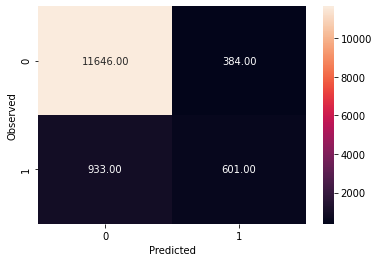

In [596]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [597]:
print("Accuracy:",accuracy_score(y_test,test_pred))
ac_boost=accuracy_score(y_test,test_pred)
print()
print("Recall:",recall_score(y_test,test_pred))
rc_boost=recall_score(y_test,test_pred)
print()
print("Precision:",precision_score(y_test,test_pred))
print()
print("F1 Score:",f1_score(y_test,test_pred))
f1_boost=f1_score(y_test,test_pred)
print()
print("Roc Auc Score:",roc_auc_score(y_test,test_pred))
m_boost=[ac_boost,rc_boost,f1_boost]

Accuracy: 0.9029047478619876

Recall: 0.3917861799217731

Precision: 0.6101522842639594

F1 Score: 0.47717348154029376

Roc Auc Score: 0.6799329902102632


#### Recall improved from Decission tree to Bsting it is almost 40 now! better than mid 35. More positive accuracy (Recall)

#### Recall Improvedd!!!! we got more of the positives predicted!! good news !

#### the results with the random split data keeps giving me better accuracy. I goes from 89 accuracy to 75  when I change to use the ordered date. 
### Let's do Bagging now

In [600]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)

In [599]:
test_predictbag = bgcl.predict(x_test)
bgcl.score(x_test , y_test)

0.9060011795930404

### Accuracy improved by a few decimas..very fewwww (let's check recall and the rest)

Confusion Matrix


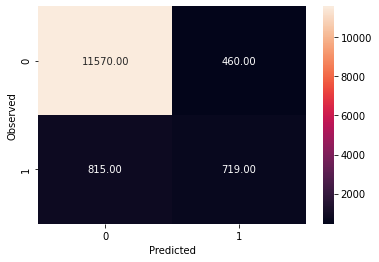

In [601]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_predictbag)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [602]:
print("Accuracy:",accuracy_score(y_test,test_predictbag))
ac_bag=accuracy_score(y_test,test_predictbag)
print()
print("Recall:",recall_score(y_test,test_predictbag))
rc_bag=recall_score(y_test,test_predictbag)
print()
print("Precision:",precision_score(y_test,test_predictbag))
print()
print("F1 Score:",f1_score(y_test,test_predictbag))
f1_bag=f1_score(y_test,test_predictbag)
print()
print("Roc Auc Score:",roc_auc_score(y_test,test_predictbag))
m_bag=[ac_bag,rc_bag,f1_bag]

Accuracy: 0.9060011795930404

Recall: 0.46870925684485004

Precision: 0.6098388464800678

F1 Score: 0.5300405455215629

Roc Auc Score: 0.7152357589294908


#### wow finally Recall is in the mid 40! it improved by a lot!!
#### same as boosting the more n-estimators, better the scores


In [486]:
results = pd.DataFrame({'Method':['Logistic Regression','Decision Tree',"Ada Boosting", "Bagging"], 'accuracy': [ac_Lg,ac_decisionT,ac_boost,ac_bag]})
results = results[['Method', 'accuracy']]


In [603]:
results['Recall']=m_logisticR[1],m_decisionT[1],m_boost[1],m_bag[1]
results['F1']=m_logisticR[2],m_decisionT[2],m_boost[2],m_bag[2]

In [604]:
results

,Method,accuracy,Recall,F1
0,Logistic Regression,0.905854,0.365059,0.467251
1,Decision Tree,0.903421,0.348761,0.449580
2,Ada Boosting,0.905854,0.391786,0.477173
3,Bagging,0.905854,0.468709,0.530041


In [605]:
# 
print(c_logR.head(5))
print()
print(c_Tree.head(5))
print()
print(c_boosting.head(5))

                 Col  Coeff LogisticR
47  poutcome_success             1.60
40         month_mar             1.52
37         month_jan             1.28
32   contact_unknown             1.18
5           duration             1.07

                   Imp
duration          0.32
day               0.08
age               0.06
pdays             0.06
poutcome_success  0.04

           Imp
duration  0.32
day       0.08
age       0.06
pdays     0.06
housing   0.04


##### Poutcome_success and Duration seem to be the only ones that persist among the 3 (methods)logistic reg, decision tree and boosting 
#### decision tree and boosting  are exactly the same !!!! when it comes to coefficients probability/ importance. Yet the recall between the two is not the same. the ensemble method of boosting has a diference of greater recall by 10!. 34% to 43%
###

# Based on the Metrics the best model is Bagging it provided the highest Recall and F1 score!!! 
## They are not the best scores but way better than Logistic regression.
## and due to that they should go with the coeffients from that model witch would put duration, day age and pdays as the most important features for the business to look at.